# Scenario 08 generation (run with metric-dev)
- Part A generates n_cells x 2 data
- Part B generates n_cells x 2000 data

In [1]:
folder_date = "2025-07-03"
scenario = "scenario_08"

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

In [3]:
results_dir = f"results/{folder_date}/out"
# os.makedirs(results_dir, exist_ok=True)
results_dir

'results/2025-07-03/out'

### Part A

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of cells
n_cells_batch1 = 1000
n_cells_batch2 = 600

# Cell types
n_type1_batch1 = 600
n_type2_batch1 = 400

n_type1_batch2 = 500
n_type2_batch2 = 100

# Generate clusters
# Type 2 Batch 1:
cluster1 = np.random.normal(loc=[0, 0], scale=0.2, size=(n_type2_batch1, 2))

# Type 2 Batch 2:
cluster2_init = np.random.normal(loc=[-1., 0], scale=0.2, size=(n_type2_batch2, 2))

# Type 1 Batch 2
cluster3 = np.random.normal(loc=[0.5, 2.5], scale=0.1, size=(100, 2))

# Remaining Type 1 Batch 1 cells
cluster4 = np.random.normal(loc=[10, 10], scale=0.3, size=(n_type1_batch1 - 100, 2))

In [5]:
mc = 0
mc

0

In [6]:
adata = sc.AnnData(np.random.rand(1100, 600))

##### Start running from here

In [495]:
# Create corresponding labels
labels = (
    ['Batch1_Type2'] * n_type2_batch1 +
    ['Batch2_Type2'] * n_type2_batch2 +
    ['Batch2_Type1'] * 100 +
    ['Batch1_Type1'] * (n_type1_batch1 - 100)
)

# Batches and cell types separately
batches = (
    ['Batch1'] * n_type2_batch1 +
    ['Batch2'] * n_type2_batch2 +
    ['Batch2'] * 100 +
    ['Batch1'] * (n_type1_batch1 - 100)
)

cell_types = (
    ['Type2'] * n_type2_batch1 +
    ['Type2'] * n_type2_batch2 +
    ['Type1'] * 100 +
    ['Type1'] * (n_type1_batch1 - 100)
)

In [496]:
labels[:5], batches[:5], cell_types[:5]

(['Batch1_Type2',
  'Batch1_Type2',
  'Batch1_Type2',
  'Batch1_Type2',
  'Batch1_Type2'],
 ['Batch1', 'Batch1', 'Batch1', 'Batch1', 'Batch1'],
 ['Type2', 'Type2', 'Type2', 'Type2', 'Type2'])

In [497]:
mc

4

In [498]:
# Update cluster2 position for next iteration
cluster2 = cluster2_init + mc *  np.array([0.25, 0])  # Shift cluster2 slightly
cluster2.mean(axis=0)

array([0.0253682 , 0.02593238])

In [499]:
scenario = f"moving_cluster_{mc}"
scenario

'moving_cluster_4'

In [500]:
mc += 1
mc

5

In [501]:
# Combine all clusters
data = np.vstack([cluster1, cluster2, cluster3, cluster4])

# Create DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])
df['batch'] = batches
df['cell_type'] = cell_types
df['Label'] = labels

In [502]:
df

,X,Y,batch,cell_type,Label
0,0.099343,-0.027653,Batch1,Type2,Batch1_Type2
1,0.129538,0.304606,Batch1,Type2,Batch1_Type2
2,-0.046831,-0.046827,Batch1,Type2,Batch1_Type2
3,0.315843,0.153487,Batch1,Type2,Batch1_Type2
4,-0.093895,0.108512,Batch1,Type2,Batch1_Type2
...,...,...,...,...,...
1095,9.520563,10.138652,Batch1,Type1,Batch1_Type1
1096,10.607293,9.591048,Batch1,Type1,Batch1_Type1
1097,10.056912,9.801405,Batch1,Type1,Batch1_Type1
1098,10.127766,10.005744,Batch1,Type1,Batch1_Type1


In [503]:
labels = df["Label"]
# Split labels into batch and type
cell_types = [label.split('_')[0] for label in labels]
batches = [label.split('_')[1] for label in labels]

# Create a DataFrame
meta_df = pd.DataFrame({
    'Batch': batches,
    'CellType': cell_types
})

# Create contingency table
contingency_table = pd.crosstab(meta_df['Batch'], meta_df['CellType'])
contingency_table

CellType,Batch1,Batch2
Batch,,
Type1,500,100
Type2,400,100


In [504]:
df

,X,Y,batch,cell_type,Label
0,0.099343,-0.027653,Batch1,Type2,Batch1_Type2
1,0.129538,0.304606,Batch1,Type2,Batch1_Type2
2,-0.046831,-0.046827,Batch1,Type2,Batch1_Type2
3,0.315843,0.153487,Batch1,Type2,Batch1_Type2
4,-0.093895,0.108512,Batch1,Type2,Batch1_Type2
...,...,...,...,...,...
1095,9.520563,10.138652,Batch1,Type1,Batch1_Type1
1096,10.607293,9.591048,Batch1,Type1,Batch1_Type1
1097,10.056912,9.801405,Batch1,Type1,Batch1_Type1
1098,10.127766,10.005744,Batch1,Type1,Batch1_Type1


In [505]:
adata.obs = df

In [506]:
adata.obsm["X_pca"] = np.array(df[["X", "Y"]])
adata.obsm["X_umap"] = np.array(df[["X", "Y"]])

In [507]:
adata

AnnData object with n_obs × n_vars = 1100 × 600
    obs: 'X', 'Y', 'batch', 'cell_type', 'Label'
    obsm: 'X_pca', 'X_umap'

In [508]:
adata.X

array([[0.47690011, 0.71833118, 0.24734032, ..., 0.80666505, 0.85802327,
        0.9976283 ],
       [0.24149649, 0.04035083, 0.41119152, ..., 0.26817437, 0.36107473,
        0.40845558],
       [0.67969722, 0.05668043, 0.0346727 , ..., 0.89699529, 0.84612421,
        0.18281339],
       ...,
       [0.02245632, 0.09951802, 0.07028588, ..., 0.36341283, 0.83501264,
        0.66438833],
       [0.41162097, 0.49570216, 0.14049282, ..., 0.8512561 , 0.5676251 ,
        0.01997402],
       [0.70856548, 0.88559218, 0.31512955, ..., 0.32853572, 0.97065691,
        0.25202568]])

In [509]:
adata.write(f"scenarios/2025-06-01_scenario_08_{scenario}.h5ad")

### Part B

In [4]:
rng = np.random.default_rng(42)

In [5]:
# 1) Latent 2D, spherical within-batch
def spherical_blob(n, center, sigma):
    return rng.normal(loc=center, scale=sigma, size=(n, 2))

In [6]:
n_type2_batch1 = 400
n_type2_batch2 = 100
n_type1_batch2 = 100
n_type1_batch1 = 500

In [7]:
Z_b1_t1 = spherical_blob(n_type1_batch1, [10, 10], 0.3)
Z_b1_t2 = spherical_blob(n_type2_batch1, [0, 0],   0.2)
Z_b2_t2 = spherical_blob(n_type2_batch2, [-1.0, 0],0.2)    # shift this cluster right
Z_b2_t1 = spherical_blob(n_type1_batch2, [0.5, 10],0.1)

In [8]:
Z_b2_t2

array([[-1.00794126e+00,  8.84909210e-02],
       [-1.06088535e+00, -8.19297857e-02],
       [-9.81529192e-01, -3.84183185e-01],
       [-9.04592975e-01, -1.12619425e-04],
       [-9.92061295e-01,  1.92146862e-01],
       [-1.39056311e+00, -3.94766774e-01],
       [-9.45239231e-01, -1.42337103e-03],
       [-9.65964611e-01, -9.24254150e-02],
       [-8.67129265e-01,  1.86527769e-01],
       [-9.03203541e-01, -5.21656917e-02],
       [-1.42153788e+00,  1.53847242e-01],
       [-7.55654267e-01,  1.28911682e-01],
       [-1.17592849e+00,  1.34758879e-01],
       [-8.27894058e-01,  3.11763250e-01],
       [-1.17522198e+00, -4.52909169e-02],
       [-8.50545590e-01,  1.14820143e-02],
       [-1.22346552e+00,  8.29232570e-02],
       [-8.84267673e-01,  1.75925793e-02],
       [-9.56083015e-01, -5.17411803e-02],
       [-7.04344213e-01, -1.80138437e-01],
       [-1.11746415e+00,  2.19710271e-03],
       [-8.24209194e-01, -2.99474634e-01],
       [-1.26205935e+00, -4.07545702e-01],
       [-9.

In [9]:
batches = (
    ['Batch1'] * n_type2_batch1 +
    ['Batch2'] * n_type2_batch2 +
    ['Batch2'] * n_type1_batch2 +
    ['Batch1'] * n_type1_batch1
)

cell_types = (
    ['Type2'] * n_type2_batch1 +
    ['Type2'] * n_type2_batch2 +
    ['Type1'] * n_type1_batch2 +
    ['Type1'] * n_type1_batch1
)

meta = pd.DataFrame({
    'batch': batches,
    'cell_type': cell_types
})

meta

,batch,cell_type
0,Batch1,Type2
1,Batch1,Type2
2,Batch1,Type2
3,Batch1,Type2
4,Batch1,Type2
...,...,...
1095,Batch1,Type1
1096,Batch1,Type1
1097,Batch1,Type1
1098,Batch1,Type1


In [10]:
# color map for batches
batch_order = sorted(meta['batch'].unique())
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
batch2color = {b: colors[i % len(colors)] for i, b in enumerate(batch_order)}
batch2color

{'Batch1': '#1f77b4', 'Batch2': '#ff7f0e'}

In [11]:
# marker map for cell types
ctype_order = sorted(meta['cell_type'].unique())  # e.g., ['Type1', 'Type2']
markers = ['o', 's', '^', 'D', 'P', 'X']           # enough shapes if more types appear
ctype2marker = {ct: markers[i % len(markers)] for i, ct in enumerate(ctype_order)}

ctype2marker

{'Type1': 'o', 'Type2': 's'}

In [12]:
# Lift to 2000-D with orthonormal mixing (preserves circularity)
n_features = 2000
A = rng.normal(size=(n_features, 2))
Q, _ = np.linalg.qr(A)        # (2000 x 2) with orthonormal columns
E = rng.normal(scale=0.1, size=(len(batches), n_features))

0


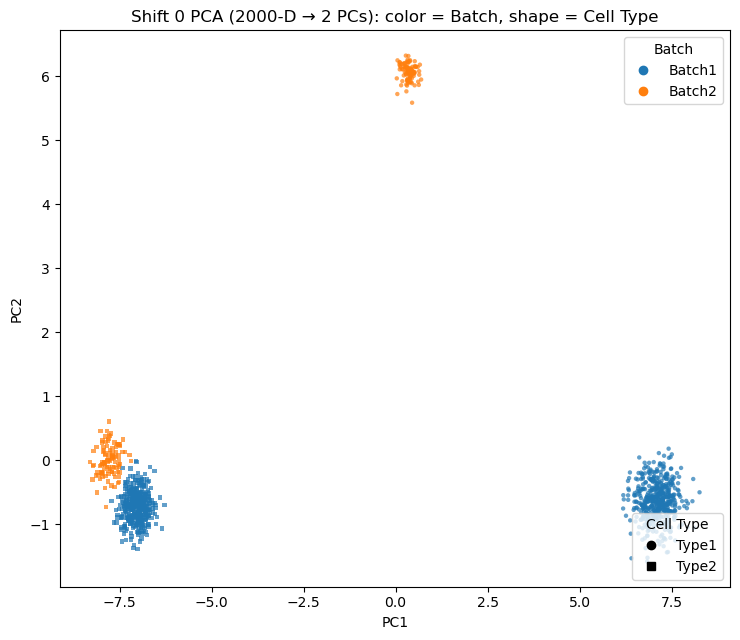

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


1


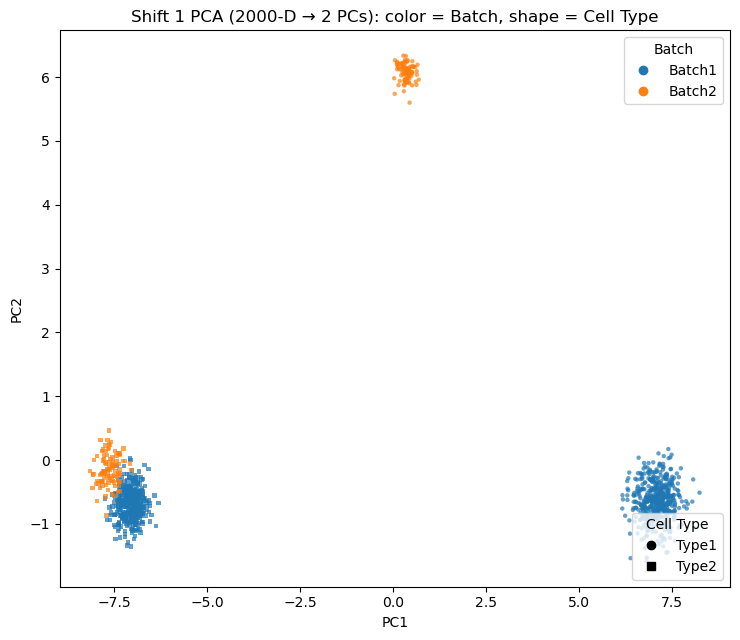

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


2


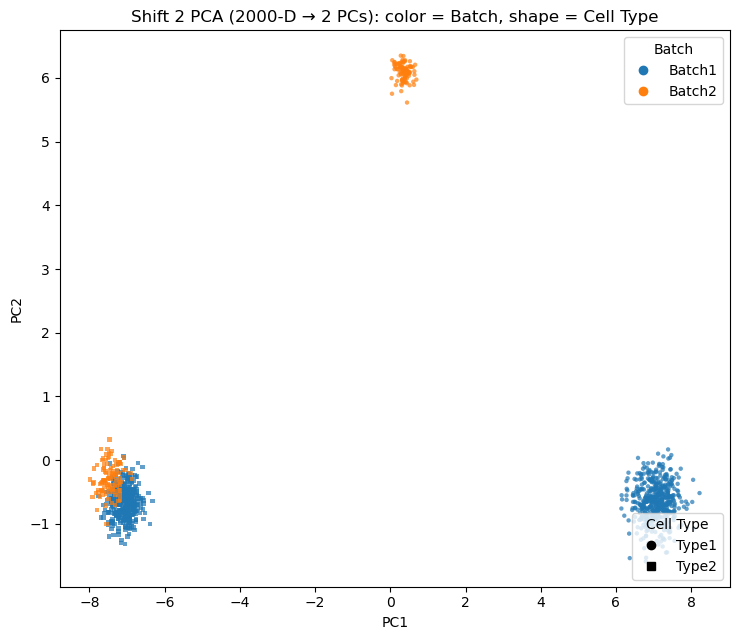

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


3


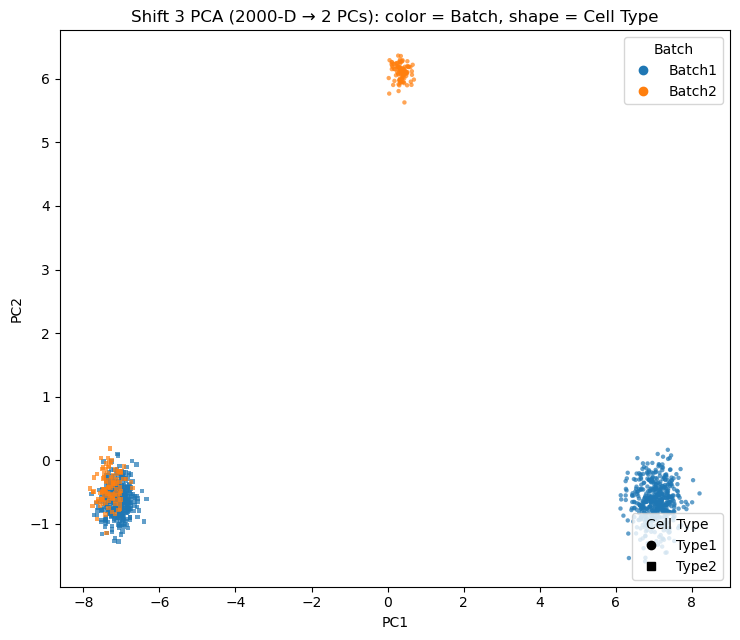

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


4


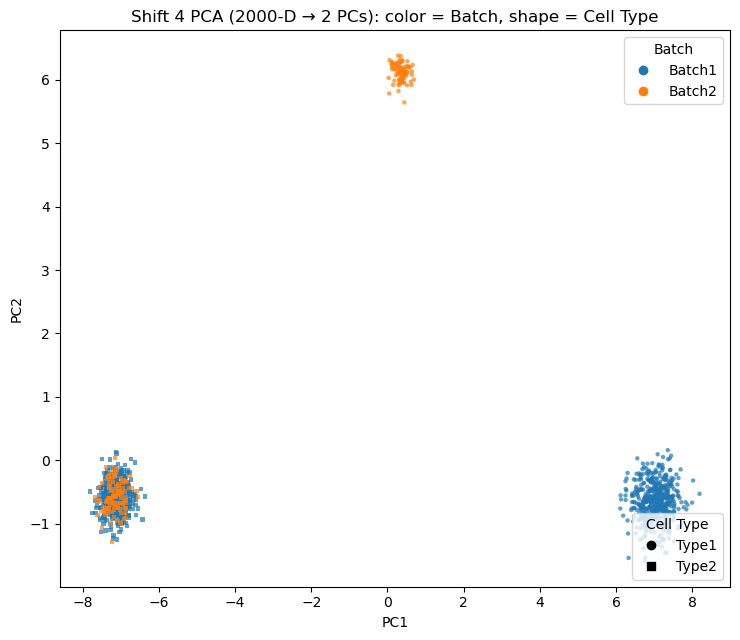

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


In [13]:
for i in range(0, 5):
    print(i)
    Z_b2_t2_shifted = Z_b2_t2 + i * np.array([0.25, 0])
    Z = np.vstack([Z_b1_t2, Z_b2_t2_shifted, Z_b2_t1, Z_b1_t1])  # (1100, 2)
    X = Z @ Q.T + E  # (1100, 2000)

    # PCA back to 2D — clusters should look ~circular
    PC = PCA(n_components=2, random_state=42).fit_transform(X)
    df_pc = pd.DataFrame(PC, columns=['PC1', 'PC2']).join(meta)

    plt.figure(figsize=(7.5, 6.5))
    for ct in ctype_order:
        for b in batch_order:
            mask = (df_pc['cell_type'] == ct) & (df_pc['batch'] == b)
            if not mask.any():
                continue
            plt.scatter(
                df_pc.loc[mask, 'PC1'],
                df_pc.loc[mask, 'PC2'],
                s=10,
                alpha=0.7,
                marker=ctype2marker[ct],
                c=batch2color[b],
                edgecolor='none',
                label=f"{ct} • {b}"
            )

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"Shift {i} PCA (2000-D → 2 PCs): color = Batch, shape = Cell Type")

    # Create two clean legends (one for color/batch, one for marker/ctype)
    batch_handles = [Line2D([0], [0], marker='o', linestyle='',
                            color=batch2color[b], label=b) for b in batch_order]
    ctype_handles = [Line2D([0], [0], marker=ctype2marker[ct], linestyle='',
                            color='black', label=ct) for ct in ctype_order]

    legend1 = plt.legend(handles=batch_handles, title="Batch", loc='upper right')
    plt.gca().add_artist(legend1)
    plt.legend(handles=ctype_handles, title="Cell Type", loc='lower right')

    plt.tight_layout()
    plt.show()

    # save as anndata
    adata = sc.AnnData(X)
    adata.obs = df_pc[['batch', 'cell_type']]
    adata.write(f"scenarios/2025-06-01_scenario_08_n_genes_2000_shift_{i}.h5ad")


In [14]:
print("End of the notebook")

End of the notebook
